In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pickle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, LSTM
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
data_folder = '/content/gdrive/MyDrive/University/master/term1/Machine-Learning/ML-Project/Data/'

In [4]:
SHAPE_SIZE = (862, 36)

In [5]:
file_name  = data_folder + "mfccaudio_chroma_features_36_all_20Sec_cleaned.pkl"
file_name_labels  = data_folder + "mfccaudio_chroma_features_36_all_20Sec_labels_cleaned.pkl"
with open(file_name, 'rb') as file:
    uncleaned_data = pickle.load(file)

with open(file_name_labels, 'rb') as file:
    uncleaned_labels = pickle.load(file)
np.shape(uncleaned_data), np.shape(uncleaned_labels)

((9538, 862, 36), (9538,))

In [6]:
np.shape(uncleaned_data[0])

(862, 36)

In [7]:
data = []
labels = []
for k, j in zip(uncleaned_data,uncleaned_labels):
    if np.shape(k) != SHAPE_SIZE:
        print(np.shape(k))
    else:
        data.append(k)
        labels.append(j)
labels = np.array(labels)
data = np.array(data)
np.shape(data), np.shape(labels)

((9538, 862, 36), (9538,))

In [8]:
np.unique(uncleaned_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
import numpy
a = numpy.array(uncleaned_labels)
unique, counts = numpy.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 1254, 1: 1264, 2: 1432, 3: 1476, 4: 1215, 5: 1514, 6: 1383}

In [10]:
labels = to_categorical(labels)
x_train, x_test, y_train, y_test =  train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=42, stratify=labels)

In [11]:
np.shape(x_train), np.shape(y_train)

((7630, 862, 36), (7630, 7))

In [12]:
class Trainer:
    def __init__(self, x_train, y_train, number_of_class=7 ,input_size=None, epochs=1000, optimizer='adam'):
        self.input_size = input_size
        self.model = Sequential()
        self.x_train, self.y_train = x_train, y_train
        self.epochs = epochs
        self.optimizer = optimizer
        self.number_of_class = number_of_class
        self.callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    # define cnn model
    def define_model(self):
        print("Build LSTM RNN model ...")
        self.model = Sequential()

        self.model.add(LSTM(units=128, dropout=0.5, return_sequences=True, input_shape=self.input_size))
        self.model.add(LSTM(units=32,  dropout=0.5, return_sequences=False))
        self.model.add(Dense(units=self.number_of_class, activation="softmax"))
        self.model.compile(optimizer=self.optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        return self.model.summary()

    def fit_model(self):
        # fit model
        self.history = self.model.fit(self.x_train, self.y_train, epochs=self.epochs, batch_size=128,
                                      validation_split=0.2, verbose=1,shuffle=True, 
                                      callbacks=[self.callback])

    def plot_history(self):
        fig = plt.figure(figsize=(12, 4))
        metrics = ['loss', 'accuracy']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 2, n + 1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()

    def evaluate(self, x_test, y_test):
        y_pred = np.argmax(self.model.predict(x_test), axis=-1)
        print(classification_report(np.argmax(y_test, axis=-1), y_pred, digits=3))



In [13]:
trainer = Trainer(x_train, y_train, input_size = SHAPE_SIZE, epochs=1000)
trainer.define_model()

Build LSTM RNN model ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 862, 128)          84480     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 7)                 231       
                                                                 
Total params: 105,319
Trainable params: 105,319
Non-trainable params: 0
_________________________________________________________________


In [14]:
trainer.fit_model()

Epoch 1/1000
48/48 [==============================] - 14s 149ms/step - loss: 1.9254 - accuracy: 0.1928 - val_loss: 1.8910 - val_accuracy: 0.2274
Epoch 2/1000
48/48 [==============================] - 5s 99ms/step - loss: 1.8729 - accuracy: 0.2379 - val_loss: 1.8312 - val_accuracy: 0.2700
Epoch 3/1000
48/48 [==============================] - 5s 96ms/step - loss: 1.8571 - accuracy: 0.2629 - val_loss: 1.8404 - val_accuracy: 0.2726
Epoch 4/1000
48/48 [==============================] - 5s 100ms/step - loss: 1.8665 - accuracy: 0.2461 - val_loss: 1.8500 - val_accuracy: 0.2680
Epoch 5/1000
48/48 [==============================] - 4s 91ms/step - loss: 1.8400 - accuracy: 0.2711 - val_loss: 1.8027 - val_accuracy: 0.2759
Epoch 6/1000
48/48 [==============================] - 5s 109ms/step - loss: 1.8839 - accuracy: 0.2335 - val_loss: 1.8640 - val_accuracy: 0.2575
Epoch 7/1000
48/48 [==============================] - 5s 101ms/step - loss: 1.8335 - accuracy: 0.2711 - val_loss: 1.7855 - val_accuracy: 0

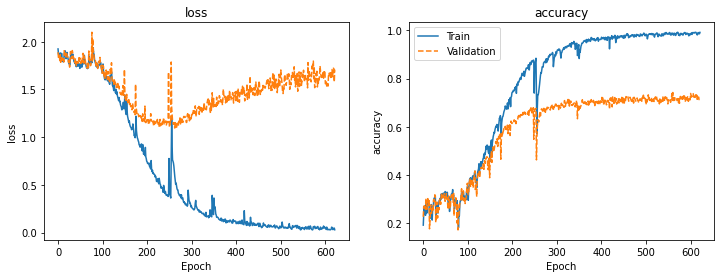

In [15]:
trainer.plot_history()

In [16]:
trainer.evaluate(x_test, y_test)

60/60 [==============================] - 4s 42ms/step
              precision    recall  f1-score   support

           0      0.712     0.649     0.679       251
           1      0.752     0.838     0.793       253
           2      0.728     0.720     0.724       286
           3      0.709     0.620     0.662       295
           4      0.623     0.658     0.640       243
           5      0.715     0.696     0.706       303
           6      0.763     0.838     0.799       277

    accuracy                          0.716      1908
   macro avg      0.715     0.717     0.715      1908
weighted avg      0.716     0.716     0.715      1908



In [17]:
trainer.evaluate(x_train, y_train)

239/239 [==============================] - 6s 24ms/step
              precision    recall  f1-score   support

           0      0.945     0.907     0.926      1003
           1      0.958     0.962     0.960      1011
           2      0.941     0.940     0.940      1146
           3      0.937     0.909     0.923      1181
           4      0.885     0.913     0.899       972
           5      0.932     0.938     0.935      1211
           6      0.942     0.970     0.956      1106

    accuracy                          0.934      7630
   macro avg      0.934     0.934     0.934      7630
weighted avg      0.935     0.934     0.934      7630

